<a href="https://colab.research.google.com/github/MaldoAlberto/Cirq-experiments/blob/master/recreate%20classic%20algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First example on CIRQ about generate a quantum  circuit that create the erosion and dilation on a binary image with a structural element of 3 pixels (static or classical mode
).
---



In [0]:
!pip install cirq-dev

     |████████████████████████████████| 1.2MB 8.9MB/s 
     |████████████████████████████████| 1.8MB 51.6MB/s 
     |████████████████████████████████| 1.2MB 42.0MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=3c91fb9be673a5c9f317bd63e004a005c10abed2a2422f97d675d3138a72368e
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


In [0]:
import cirq
import numpy as np
from cirq.devices import GridQubit

Generare a matriz that represent the binary image (6x6) and depends or the structural element (1x3) we adder 2 more  columns pixel for its. So is (6x8) 


In [0]:
imagen_entrada = np.zeros((6,8),np.uint8)
imagen_entrada[1][2] = 1
imagen_entrada[1][3] = 1
imagen_entrada[2][2] = 1
imagen_entrada[2][3] = 1
imagen_entrada[2][5] = 1
imagen_entrada[3][2] = 1
imagen_entrada[3][5] = 1
imagen_entrada[4][5] = 1


In [0]:
print(imagen_entrada, len(imagen_entrada),len(imagen_entrada[0]))


#salidas erosion y dilatacion

erosion= []
dilatacion = []

[[0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]] 6 8


The gate desing to create a AND-OR, NAND-NOR with three qubits 

In [0]:
#compuerta diseñada U
def compuerta(circuit,device,a,b,c):
  circuit.append(cirq.X(device.qubits[a]))
  circuit.append(cirq.TOFFOLI(device.qubits[a],device.qubits[b],device.qubits[c]))
  circuit.append(cirq.CNOT(device.qubits[c],device.qubits[b]))
  circuit.append(cirq.X(device.qubits[a]))
  circuit.append(cirq.CNOT(device.qubits[a],device.qubits[c]))

Using an example of the cirq repository of the  simulator grid.

In [0]:
class Xmon10Device(cirq.Device):

  def __init__(self):
      self.qubits = [GridQubit(i, 0) for i in range(31)]

  def duration_of(self, operation):
      # Wouldn't it be nice if everything took 10ns?
      return cirq.Duration(nanos=10)

  def validate_operation(self, operation):
      if not isinstance(operation, cirq.GateOperation):
          raise ValueError('{!r} is not a supported operation'.format(operation))
      if not isinstance(operation.gate, (cirq.CZPowGate,
                                         cirq.XPowGate,
                                         cirq.PhasedXPowGate,
                                         cirq.YPowGate)):
          raise ValueError('{!r} is not a supported gate'.format(operation.gate))
      if len(operation.qubits) == 2:
          p, q = operation.qubits
          if not p.is_adjacent(q):
            raise ValueError('Non-local interaction: {}'.format(repr(operation)))


  def validate_scheduled_operation(self, schedule, scheduled_operation):
      self.validate_operation(scheduled_operation.operation)

  def validate_circuit(self, circuit):
      for moment in circuit:
          for operation in moment.operations:
              self.validate_operation(operation)

  def validate_schedule(self, schedule):
      for scheduled_operation in schedule.scheduled_operations:
          self.validate_scheduled_operation(schedule, scheduled_operation)

We design the simulation for works between each  pixel of the image and the structural element, using 7 qubits and 1000 iteration per subpixel group.

0
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


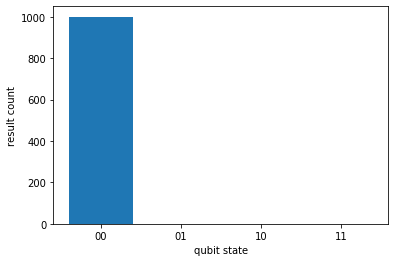

100.0 0.0 0.0 0.0
[0]
[0]
0
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


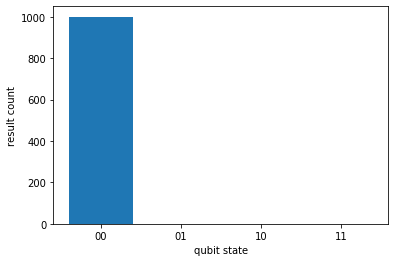

100.0 0.0 0.0 0.0
[0, 0]
[0, 0]
0
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


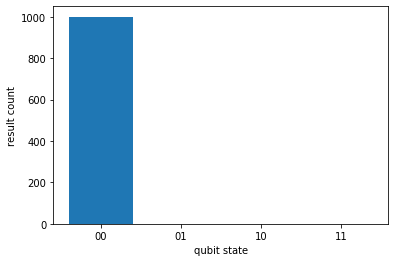

100.0 0.0 0.0 0.0
[0, 0, 0]
[0, 0, 0]
0
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


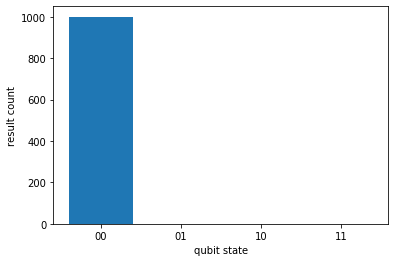

100.0 0.0 0.0 0.0
[0, 0, 0, 0]
[0, 0, 0, 0]
0
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


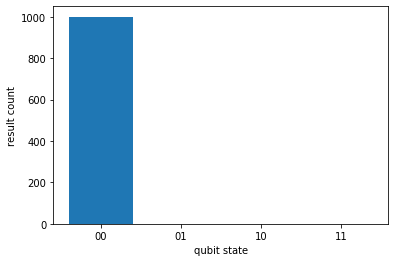

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
0
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


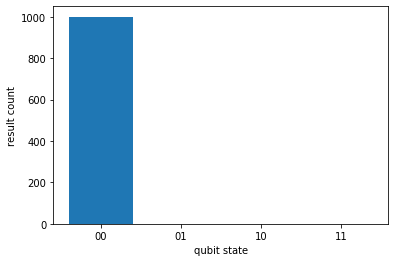

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
0
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


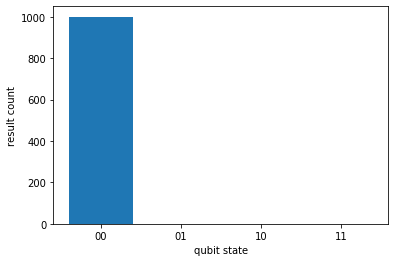

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
1
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


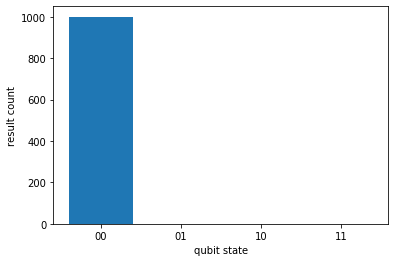

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
1
cirq.TOFFOLI is not a supported gate
                       ┌──┐   ┌──┐
(0, 0): ───X───@───X────@────────────────────
               │        │
(1, 0): ───X───@───X────┼X──────@────X───@───
               │   │    │       │        │
(2, 0): ───────X───@────X───────┼────────┼───
                                │        │
(3, 0): ───X───X───@────X──────@┼────────┼───
                   │           ││        │
(4, 0): ───X───────@────X──────┼@────X───┼───
                   │    │      ││    │   │
(5, 0): ───────────X────@──────X┼────┼───┼───
                                │    │   │
(6, 0): ────────────────────────X────@───X───
                       └──┘   └──┘
Results:


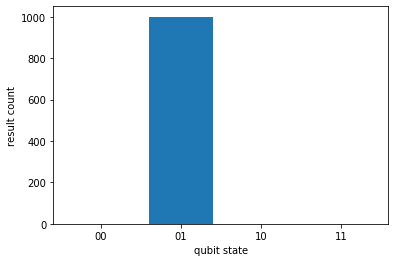

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
1
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───X───@───X────@─────┼───────┼───
                   │        │     │       │
(4, 0): ───X───────@───X────┼─────@───X───┼───
                   │   │    │     │   │   │
(5, 0): ───────────X───@────X─────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


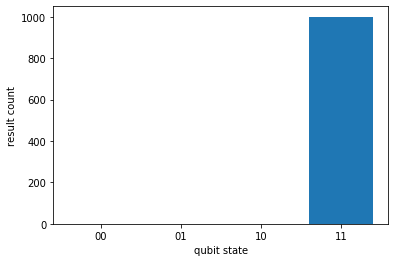

0.0 0.0 0.0 100.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
1
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───@───X───@──────────┼───────┼───
               │       │          │       │
(4, 0): ───X───@───X───┼──────────@───X───┼───
               │   │   │          │   │   │
(5, 0): ───────X───@───X──────────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


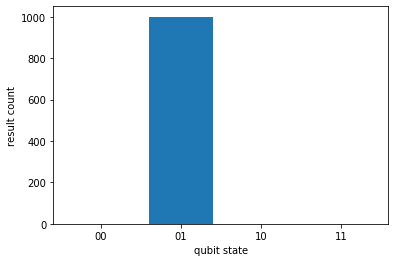

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
1
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


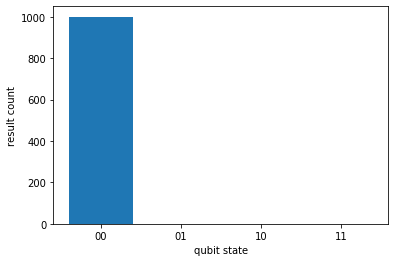

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
1
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


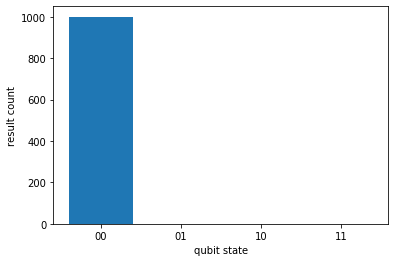

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
1
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


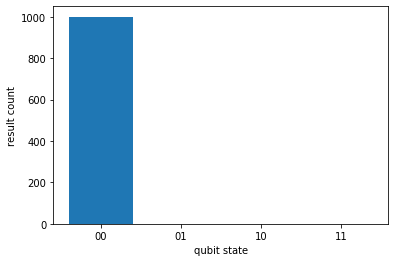

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
2
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


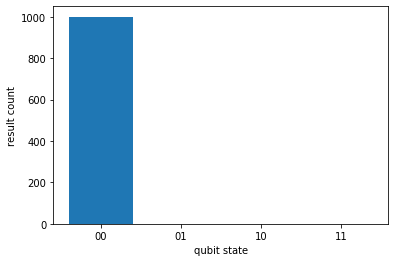

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
2
cirq.TOFFOLI is not a supported gate
                       ┌──┐   ┌──┐
(0, 0): ───X───@───X────@────────────────────
               │        │
(1, 0): ───X───@───X────┼X──────@────X───@───
               │   │    │       │        │
(2, 0): ───────X───@────X───────┼────────┼───
                                │        │
(3, 0): ───X───X───@────X──────@┼────────┼───
                   │           ││        │
(4, 0): ───X───────@────X──────┼@────X───┼───
                   │    │      ││    │   │
(5, 0): ───────────X────@──────X┼────┼───┼───
                                │    │   │
(6, 0): ────────────────────────X────@───X───
                       └──┘   └──┘
Results:


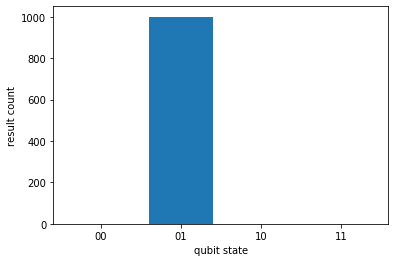

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
2
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───X───@───X────@─────┼───────┼───
                   │        │     │       │
(4, 0): ───X───────@───X────┼─────@───X───┼───
                   │   │    │     │   │   │
(5, 0): ───────────X───@────X─────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


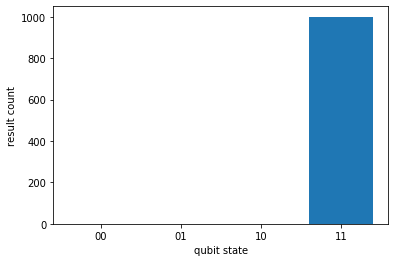

0.0 0.0 0.0 100.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
2
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───@───X───@──────────┼───────┼───
               │       │          │       │
(4, 0): ───X───@───X───┼──────────@───X───┼───
               │   │   │          │   │   │
(5, 0): ───────X───@───X──────────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


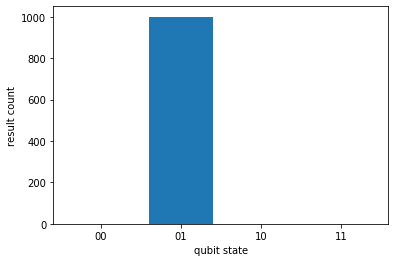

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
2
cirq.TOFFOLI is not a supported gate
                       ┌──┐   ┌──┐
(0, 0): ───X───@───X────@────────────────────
               │        │
(1, 0): ───X───@───X────┼X──────@────X───@───
               │   │    │       │        │
(2, 0): ───────X───@────X───────┼────────┼───
                                │        │
(3, 0): ───X───X───@────X──────@┼────────┼───
                   │           ││        │
(4, 0): ───X───────@────X──────┼@────X───┼───
                   │    │      ││    │   │
(5, 0): ───────────X────@──────X┼────┼───┼───
                                │    │   │
(6, 0): ────────────────────────X────@───X───
                       └──┘   └──┘
Results:


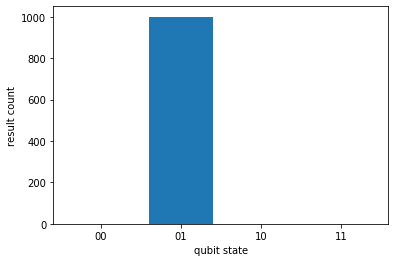

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
2
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───@───X───@──────────┼───────┼───
               │       │          │       │
(4, 0): ───X───@───X───┼──────────@───X───┼───
               │   │   │          │   │   │
(5, 0): ───────X───@───X──────────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


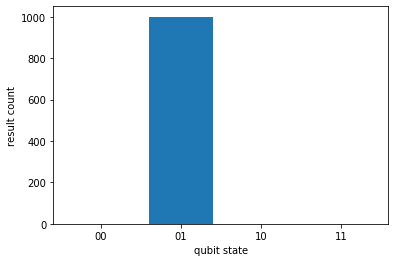

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]
2
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


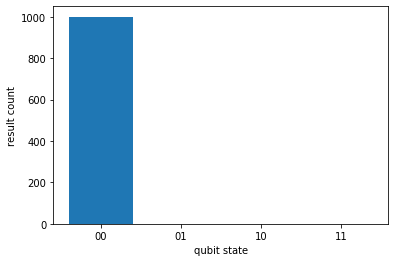

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
3
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


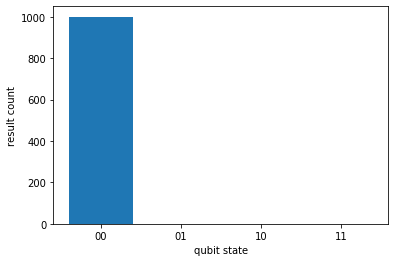

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
3
cirq.TOFFOLI is not a supported gate
                       ┌──┐   ┌──┐
(0, 0): ───X───@───X────@────────────────────
               │        │
(1, 0): ───X───@───X────┼X──────@────X───@───
               │   │    │       │        │
(2, 0): ───────X───@────X───────┼────────┼───
                                │        │
(3, 0): ───X───X───@────X──────@┼────────┼───
                   │           ││        │
(4, 0): ───X───────@────X──────┼@────X───┼───
                   │    │      ││    │   │
(5, 0): ───────────X────@──────X┼────┼───┼───
                                │    │   │
(6, 0): ────────────────────────X────@───X───
                       └──┘   └──┘
Results:


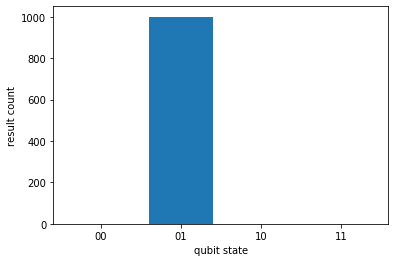

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]
3
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───@───X───@──────────┼───────┼───
               │       │          │       │
(4, 0): ───X───@───X───┼──────────@───X───┼───
               │   │   │          │   │   │
(5, 0): ───────X───@───X──────────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


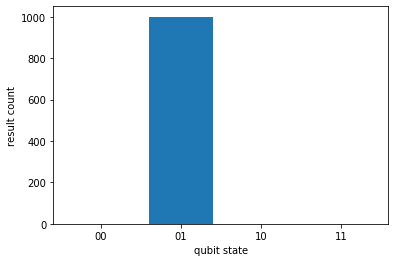

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
3
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


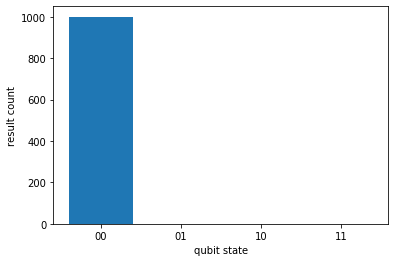

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
3
cirq.TOFFOLI is not a supported gate
                       ┌──┐   ┌──┐
(0, 0): ───X───@───X────@────────────────────
               │        │
(1, 0): ───X───@───X────┼X──────@────X───@───
               │   │    │       │        │
(2, 0): ───────X───@────X───────┼────────┼───
                                │        │
(3, 0): ───X───X───@────X──────@┼────────┼───
                   │           ││        │
(4, 0): ───X───────@────X──────┼@────X───┼───
                   │    │      ││    │   │
(5, 0): ───────────X────@──────X┼────┼───┼───
                                │    │   │
(6, 0): ────────────────────────X────@───X───
                       └──┘   └──┘
Results:


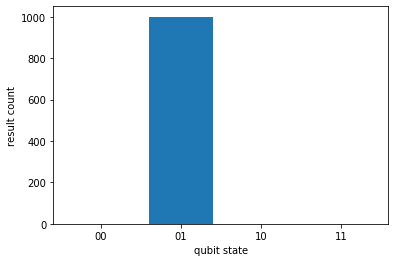

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]
3
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───@───X───@──────────┼───────┼───
               │       │          │       │
(4, 0): ───X───@───X───┼──────────@───X───┼───
               │   │   │          │   │   │
(5, 0): ───────X───@───X──────────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


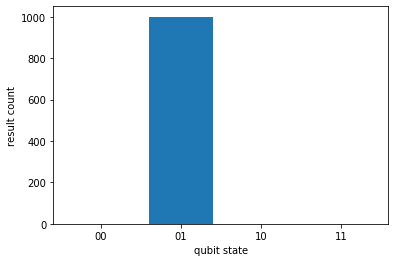

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
3
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


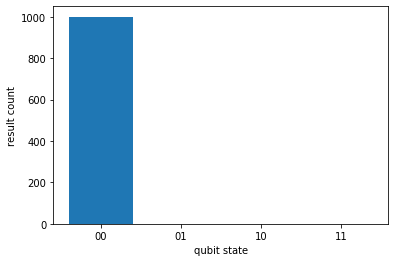

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]
4
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


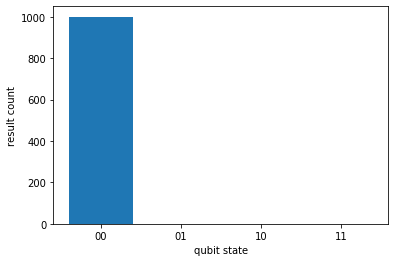

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
4
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


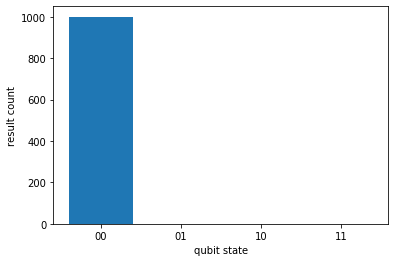

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
4
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


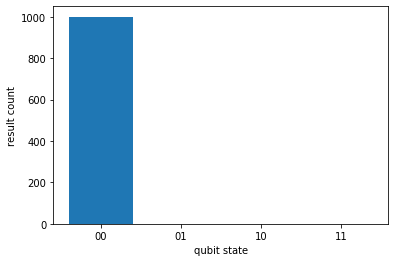

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0]
4
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


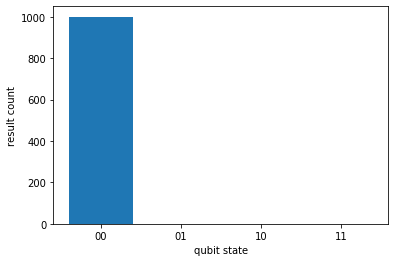

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
4
cirq.TOFFOLI is not a supported gate
                       ┌──┐   ┌──┐
(0, 0): ───X───@───X────@────────────────────
               │        │
(1, 0): ───X───@───X────┼X──────@────X───@───
               │   │    │       │        │
(2, 0): ───────X───@────X───────┼────────┼───
                                │        │
(3, 0): ───X───X───@────X──────@┼────────┼───
                   │           ││        │
(4, 0): ───X───────@────X──────┼@────X───┼───
                   │    │      ││    │   │
(5, 0): ───────────X────@──────X┼────┼───┼───
                                │    │   │
(6, 0): ────────────────────────X────@───X───
                       └──┘   └──┘
Results:


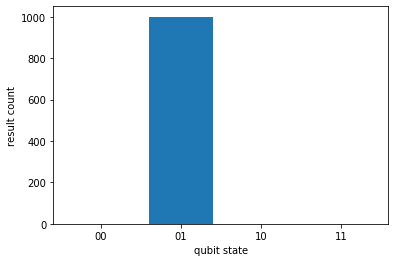

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]
4
cirq.TOFFOLI is not a supported gate
                           ┌──┐
(0, 0): ───X───X───@───X────@─────────────────
                   │        │
(1, 0): ───X───────@───X────┼X────@───X───@───
                   │   │    │     │       │
(2, 0): ───────────X───@────X─────┼───────┼───
                                  │       │
(3, 0): ───X───@───X───@──────────┼───────┼───
               │       │          │       │
(4, 0): ───X───@───X───┼──────────@───X───┼───
               │   │   │          │   │   │
(5, 0): ───────X───@───X──────────┼───┼───┼───
                                  │   │   │
(6, 0): ──────────────────────────X───@───X───
                           └──┘
Results:


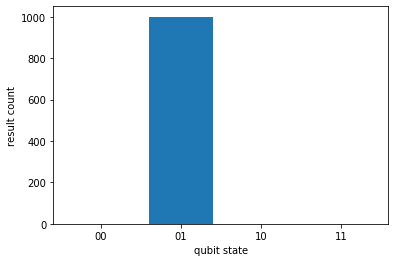

0.0 100.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
4
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


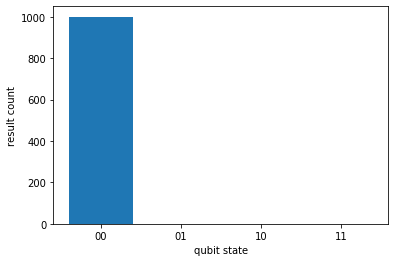

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
5
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


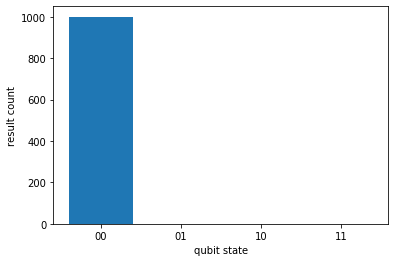

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
5
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


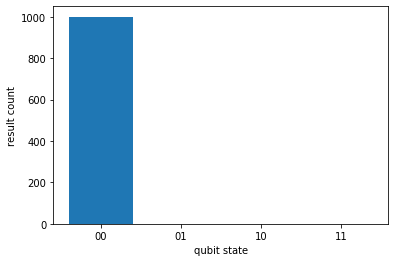

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
5
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


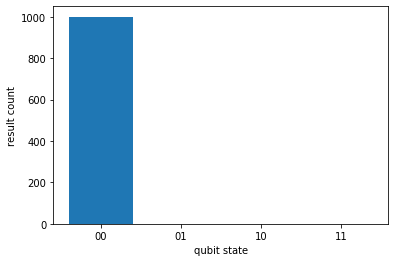

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
5
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


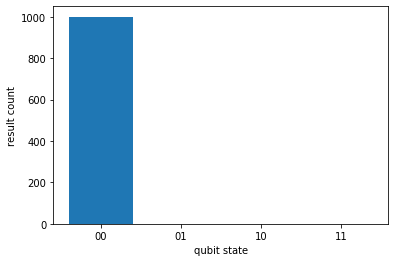

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
5
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


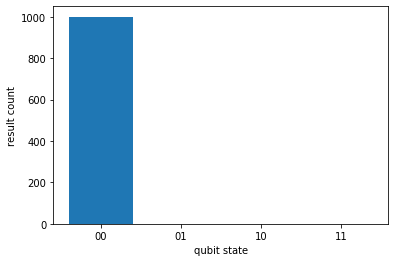

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
5
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


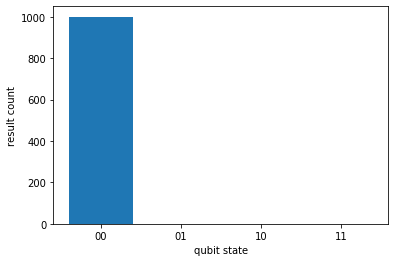

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
5
cirq.TOFFOLI is not a supported gate
                       ┌──┐
(0, 0): ───X───@───X────@─────────────────
               │        │
(1, 0): ───X───@───X────┼X────@───X───@───
               │   │    │     │       │
(2, 0): ───────X───@────X─────┼───────┼───
                              │       │
(3, 0): ───X───@───X────@─────┼───────┼───
               │        │     │       │
(4, 0): ───X───@───X────┼─────@───X───┼───
               │   │    │     │   │   │
(5, 0): ───────X───@────X─────┼───┼───┼───
                              │   │   │
(6, 0): ──────────────────────X───@───X───
                       └──┘
Results:


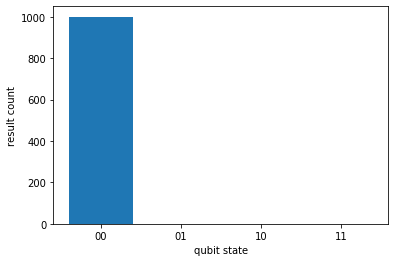

100.0 0.0 0.0 0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
for i in range(len(imagen_entrada)):
  for j in range(len(imagen_entrada[0])-1):
    print(i)    
    device = Xmon10Device()
    circuit = cirq.Circuit()

#arbol 1
    if imagen_entrada[i][j] == 1:
      circuit.append(cirq.X(device.qubits[0]))
    circuit.append(cirq.X(device.qubits[1]))
    if imagen_entrada[i][j+1] == 1:
      circuit.append(cirq.X(device.qubits[3]))
    circuit.append(cirq.X(device.qubits[4]))
    compuerta(circuit,device,0,1,2)
    compuerta(circuit,device,3,4,5)
    compuerta(circuit,device,1,4,6) 

#simulacion

    try:
      device.validate_circuit(circuit)
    except ValueError as e:
      print(e)
    print(circuit)
    simulator = cirq.Simulator()
    circuit.append(cirq.measure(device.qubits[4], key='m1'))
    circuit.append(cirq.measure(device.qubits[6], key='m3'))
    iteraciones = 1000
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=iteraciones)
    print("Results:")
#print(result)
    out = result.histogram(key="m3")
#print(out)
    counts = cirq.plot_state_histogram(result)
#print("counts =", counts)
    print(counts[0]/iteraciones*100, counts[1]/iteraciones*100, counts[2]/iteraciones*100, counts[3]/iteraciones*100)

    count = []
    count.append(counts[0])
    count.append(counts[1])
    count.append(counts[2])
    count.append(counts[3])

    if max(count) == counts[0]:
      erosion.append(0)
      dilatacion.append(0)
    elif max(count) == counts[1]:
      erosion.append(0)
      dilatacion.append(1)
    elif max(count) == counts[2]:
      erosion.append(1)
      dilatacion.append(0)
    elif max(count) == counts[3]:
      erosion.append(1)
      dilatacion.append(1)

    print(erosion)
    print(dilatacion)


we save in two list the result of dilation and erosion and we reshape in a matrix of (6x6)

In [0]:
x = dilatacion
x = np.array(x).reshape(6,7)
x = np.delete(x, [6], axis=1)
print("dilatacion")
print()
print(x)


y = erosion
y = np.array(y).reshape(6,7)
y = np.delete(y, [6], axis=1)
print("erosion")
print()
print(y)




dilatacion

[[0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 1 1 1 1 1]
 [0 1 1 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]]
erosion

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


We show the input as the erosion and dilation results  in images.

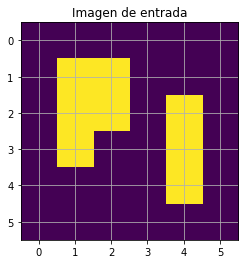

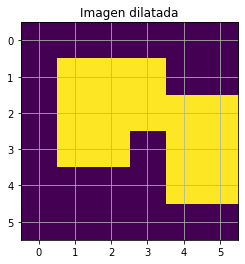

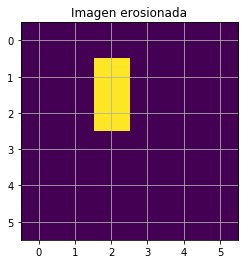

In [0]:
from pylab import *
figure(1)
title("Imagen de entrada")
imagen_entrada_2 = np.delete(imagen_entrada, [0,7], axis=1)


imshow(imagen_entrada_2, interpolation='nearest')
grid(True)

figure(2)
title("Imagen dilatada")
imshow(x, interpolation='nearest')
grid(True)


figure(3)
title("Imagen erosionada")
imshow(y, interpolation='nearest')
grid(True)

